In [28]:
! pip install pypdf langchain langchain-openai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [29]:
! pip install langchain umap-learn scikit-learn langchain_community tiktoken langchain-openai langchainhub

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [30]:
! pip install python-dotenv pandas numpy pickle

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [31]:
!pip install byaldi claudette
!sudo apt-get install -y poppler-utils
!pip install -q git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn optimum auto-gptq bitsandbytes
  

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.4).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "/teamspace/studios/this_studio/.venv/lib/python3.10/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/teamspace/studios/this_studio/.venv/lib/python3.10/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "/teamspace/studios/this_studio/.venv/lib/python3.10/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "/tmp/pip-build-env-zxwh8ng9/overlay/lib/python3.10/site-packages/setuptools/build_meta.py", line 332, in get_requires_for_build_wheel
          return self._get_build_requires(confi

In [32]:
!pip install -qU langchain-community faiss-cpu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
from helper import *
from langchain_community.vectorstores import FAISS

import base64
# import os
# os.environ["HF_TOKEN"] = userdata.get('hugging_face_api_key')# to download the ColPali model
# os.environ["ANTHROPIC_API_KEY"] = userdata.get('ANTHROPIC_API_KEY')
from byaldi import RAGMultiModalModel
from claudette import *
from dotenv import load_dotenv
load_dotenv()

True

In [34]:
import time
import pickle
def normal_injection():
    start_time = time.time()  # Start the timer

    # File processing
    pages = file_to_chunks("data")

    # Save pages to pickle file
    with open("pages.pkl", "wb") as f:
        pickle.dump(pages, f)

    # Create FAISS database from pages
    db = FAISS.from_documents(pages, OpenAIEmbeddings())
    
    # Save the FAISS database locally
    db.save_local("Normal")

    end_time = time.time()  # End the timer
    total_time = end_time - start_time  # Calculate the total time

    print(f"Time taken to run the function: {total_time} seconds")




In [35]:
import os 
from langchain.docstore.document import Document
def file_to_Raptor_chunks(folder):
    pages=[]
    for file_name in os.listdir(f"{folder}"):
        d=load_file(f"{folder}/{file_name}")
        print(file_name)
        raptor_chunks=recursive_embed_cluster_summarize([p.page_content for p in d], level=1, n_levels=5)
        all_texts = [p.page_content for p in d]
        for level in sorted(raptor_chunks.keys()):
            # Extract summaries from the current level's DataFrame
            summaries = raptor_chunks[level][1]["summaries"].tolist()
            # Extend all_texts with the summaries from the current level
            all_texts.extend(summaries)
        document =  []
        for item in range(len(all_texts)):
            page = Document(page_content=all_texts[item],metadata={"file_name":file_name})
            document.append(page)
        pages.extend(document)
    return pages

In [36]:
import time
import pickle
def raptor_injestion():
    start_time = time.time() 
    d=file_to_Raptor_chunks("data")
    with open("RAPTOR.pkl", "wb") as f:
        pickle.dump(d, f)

    db = FAISS.from_documents(d, OpenAIEmbeddings())
    db.save_local("RAPTOR")
    end_time = time.time()  # End the timer
    total_time = end_time - start_time  # Calculate the total time

    print(f"Time taken to run the function: {total_time} seconds")

In [37]:
Query="what is the shyam sundar's qualification?"

In [38]:
from langchain_openai import ChatOpenAI

from langchain_core.runnables import RunnablePassthrough
from langchain import hub


def rag(database_name,Query):
    db=FAISS.load_local(database_name,OpenAIEmbeddings(),allow_dangerous_deserialization=True)
    faiss_retriever=db.as_retriever(search_kwargs={'k': 4})

    llm = ChatOpenAI(model="gpt-4o-mini")
    prompt = hub.pull("rlm/rag-prompt")

    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)


    normal_rag_chain = (
        {"context": faiss_retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
    )

    return normal_rag_chain.invoke(Query)

In [39]:
def colpali(query):
    from byaldi import RAGMultiModalModel

    model = RAGMultiModalModel.from_index("attention")
    results = model.search(query, k=1)
    image_bytes = base64.b64decode(results[0].base64)

    chat = Chat(models[1])
    # models is a claudette helper that contains the list of models available on your account, as of 2024-09-06, [1] is Claude Sonnet 3.5:
    return chat([image_bytes, query])

In [40]:
Query="what is the shyam sundar's qualification?"

In [41]:
rag("Normal",Query)

/teamspace/studios/this_studio/.venv/lib/python3.10/site-packages/langsmith/client.py:312: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


"The context does not provide specific information about Shyam Sundar's qualifications. It mainly outlines his experience as a Machine Learning Engineer Intern and his work with various technologies. Therefore, I don't know his qualifications."

In [42]:
rag("RAPTOR",Query)

/teamspace/studios/this_studio/.venv/lib/python3.10/site-packages/langsmith/client.py:312: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


'Shyam Sundar holds an M.Tech in Modelling and Simulation from the Defence Institute of Advanced Technology, Pune, with a GPA of 7.95, and a B.Tech in Chemical Engineering from the National Institute of Technology, Tiruchirappalli, with a GPA of 7.65.'

In [43]:
colpali(query=Query)

{'model_name': 'vidore/colpali-v1.2', 'full_document_collection': True, 'highest_doc_id': 5, 'library_version': '0.0.2.post2'}
Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


/teamspace/studios/this_studio/.venv/lib/python3.10/site-packages/transformers/models/paligemma/configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]


You are using in-memory collection. This means every image is stored in memory.
You might want to rethink this if you have a large collection!
Loaded 44 images from 1 JSON files.


/teamspace/studios/this_studio/.venv/lib/python3.10/site-packages/byaldi/colpali.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.indexed_embeddings.extend(torch.l

Based on the education section of the resume, Shyam Sundar's qualifications are:

1. M.Tech in Modelling and Simulation from Defence Institute of Advanced Technology in Pune, IN, with a GPA of 7.95, completed in May 2023.

2. B.Tech in Chemical Engineering from National Institute of Technology in Tiruchirappalli, IN, with a GPA of 7.65, completed in May 2021.

These degrees represent Shyam Sundar's formal educational qualifications. Additionally, the resume lists various technical skills, certifications, and work experiences that further demonstrate their qualifications in the field of machine learning and data science.

<details>

- id: `msg_018tPcTQrnAmUhCPBNsbxCyi`
- content: `[{'text': "Based on the education section of the resume, Shyam Sundar's qualifications are:\n\n1. M.Tech in Modelling and Simulation from Defence Institute of Advanced Technology in Pune, IN, with a GPA of 7.95, completed in May 2023.\n\n2. B.Tech in Chemical Engineering from National Institute of Technology in Tiruchirappalli, IN, with a GPA of 7.65, completed in May 2021.\n\nThese degrees represent Shyam Sundar's formal educational qualifications. Additionally, the resume lists various technical skills, certifications, and work experiences that further demonstrate their qualifications in the field of machine learning and data science.", 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 1518, 'output_tokens': 152, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

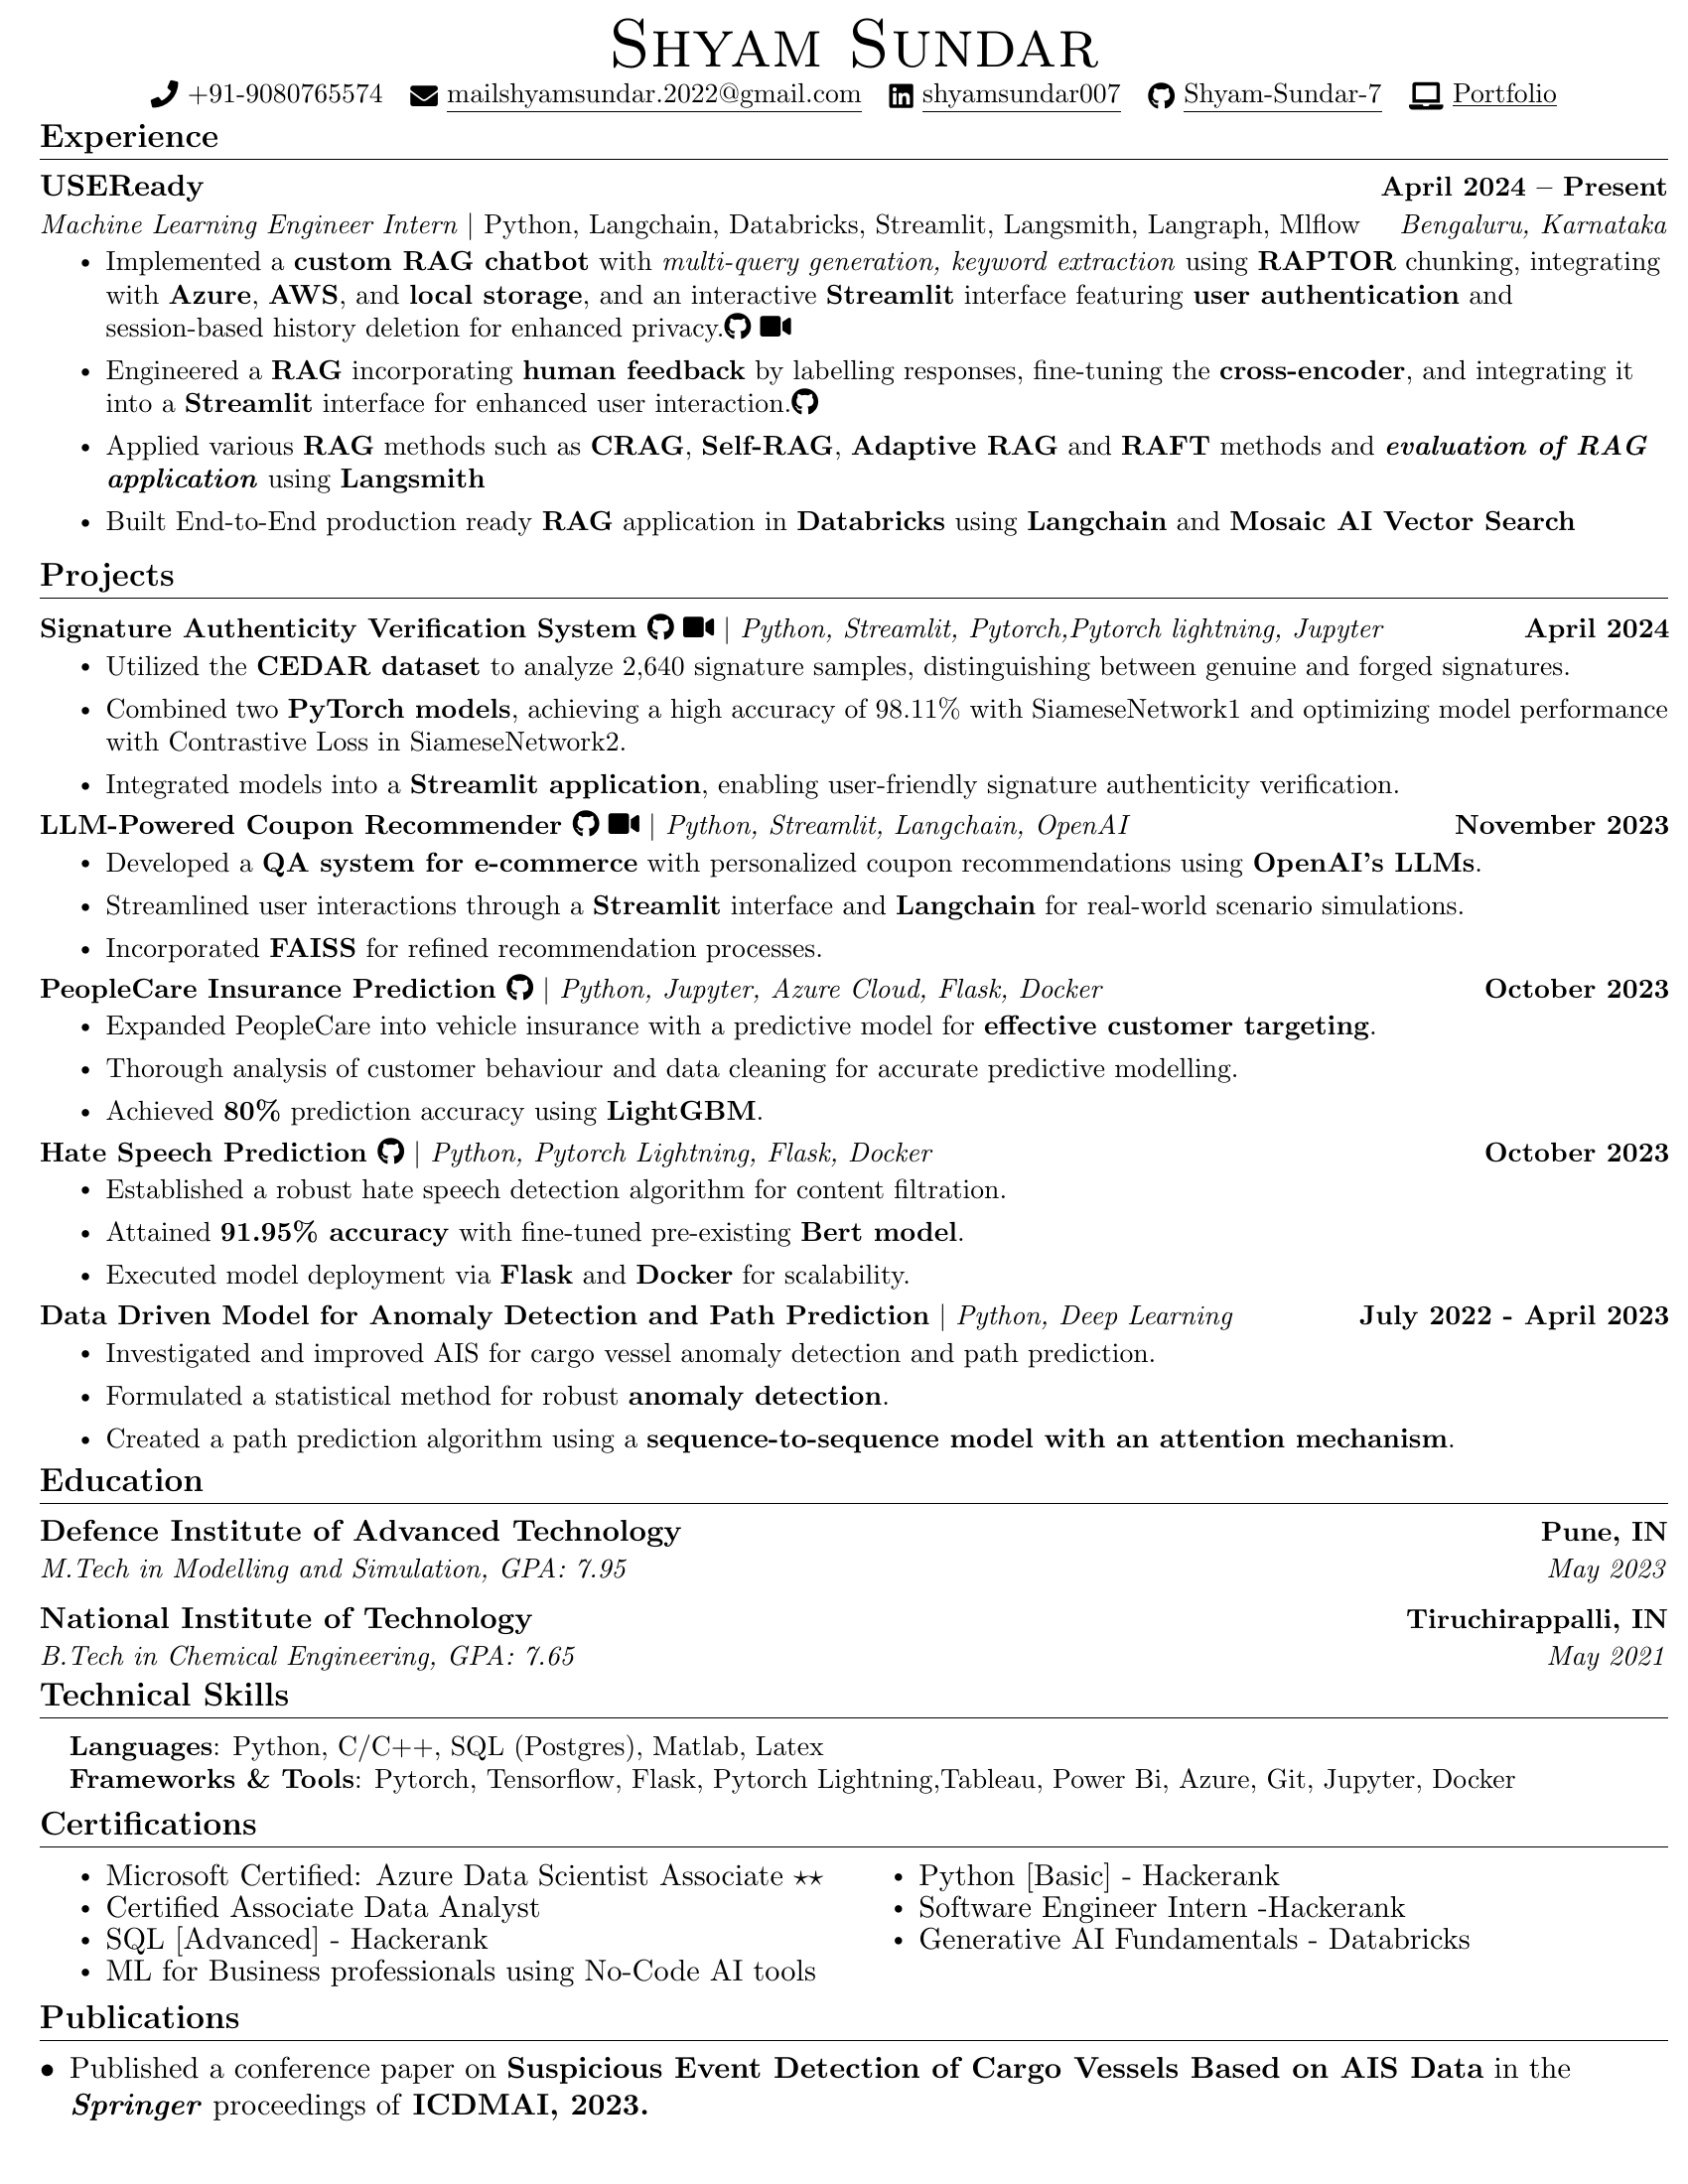

In [44]:
image_bytes = base64.b64decode(results[0].base64)

filename = 'image.jpg'  # I assume you have a JPG file
with open(filename, 'wb') as f:
  f.write(image_bytes)
  
from IPython.display import Image

display(Image(filename))

In [45]:
!pip freeze > requirements.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
